In [3]:
import numpy as np                                
import pandas as pd                               
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import Image                 
from IPython.display import display               
from sklearn.datasets import dump_svmlight_file   
from time import gmtime, strftime  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import sys                                        
import math                                       
import json
import boto3
from sagemaker import get_execution_role

In [5]:
bucket = 'ashwathbucket'
prefix = 'Heart-Disease'
role = get_execution_role()

In [8]:
raw_data_filename = 'heart.csv'
s3 = boto3.resource('s3')
data = pd.read_csv('heart.csv')
pd.set_option('display.max_rows', 20) 
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking For Null Values

In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

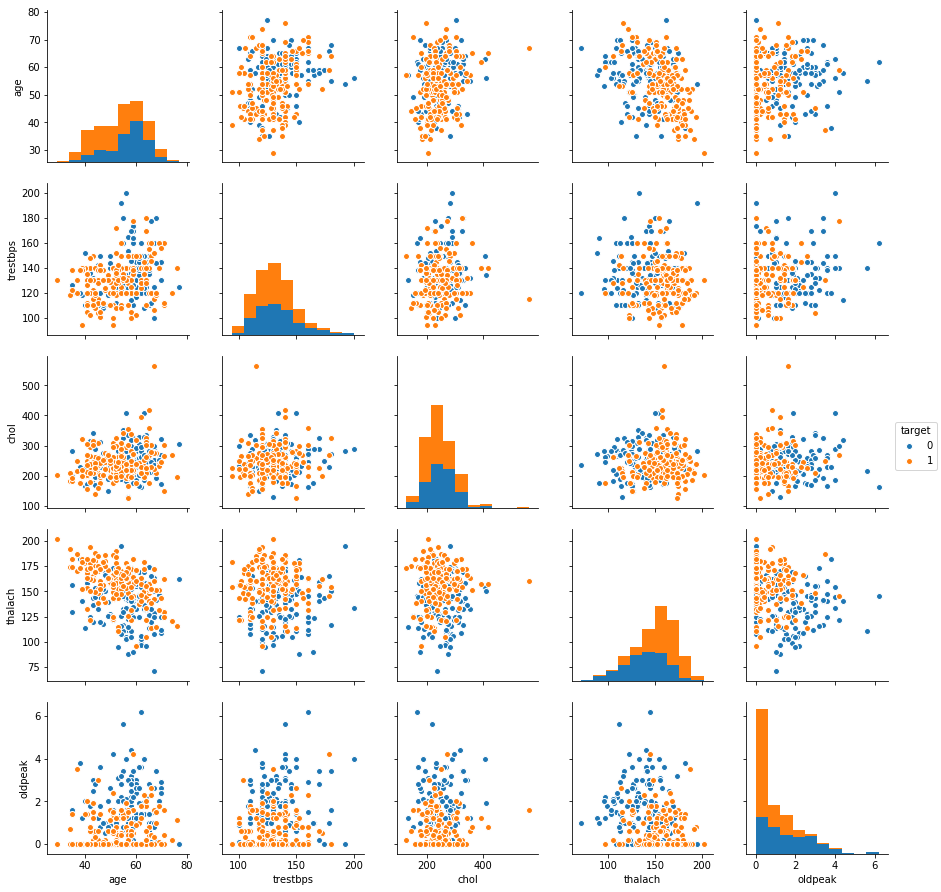

In [11]:
sns.pairplot(data, hue = 'target' , vars = ['age' , 'trestbps' , 'chol' , 'thalach' , 'oldpeak'] )
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


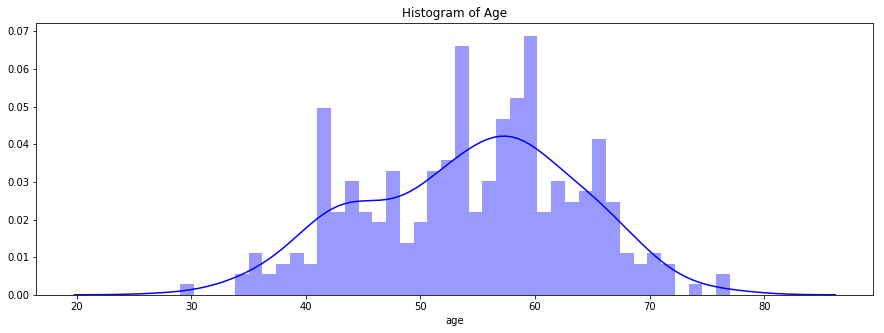

In [12]:
plt.figure(1 , figsize = (15 , 5))
sns.distplot(a = data['age'] , bins = 40 , color = 'blue' )
plt.title('Histogram of Age')
plt.show()


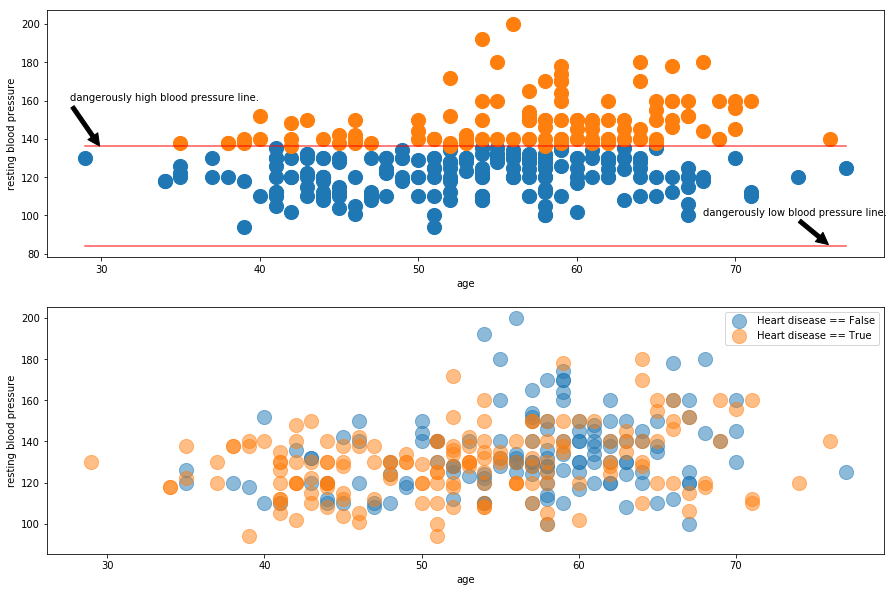

In [14]:
plt.figure(1 , figsize = (15 , 10 ))
plt.subplot(2 , 1 , 1)
plt.scatter(x = 'age' , y = 'trestbps' , data = data.where(data['trestbps'] <= 135) ,
            s = 200)
plt.scatter(x = 'age' , y = 'trestbps' , data = data.where(data['trestbps'] > 135) ,
            s = 200)
plt.scatter(x = 'age' , y = 'trestbps' , data = data.where(data['trestbps'] < 83) ,
            s = 200)
for critical in [84 , 136]:
    plt.plot(data['age'] , np.ones((data.shape[0] , 1))*critical , 'r-' , alpha = 0.5)

plt.annotate('dangerously high blood pressure line.', xy=(30, 135), xytext=(28, 160),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate('dangerously low blood pressure line.', xy=(76, 84), xytext=(68, 100),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.xlabel('age')
plt.ylabel('resting blood pressure')

plt.subplot(2 , 1 , 2)
plt.scatter(x = 'age' , y = 'trestbps' , s = 200 , data = data[data['target'] == 0] ,
            label = 'Heart disease == False' , alpha = 0.5)
plt.scatter(x = 'age' , y = 'trestbps' , s = 200 , data = data[data['target'] == 1] ,
           label = 'Heart disease == True' , alpha = 0.5)
plt.xlabel('age')
plt.ylabel('resting blood pressure')
plt.legend()
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
x = data.iloc[: , :-1].values
y = data.iloc[: , -1].values
x_train , x_test , y_train , y_test = train_test_split(x , y ,
                                                      test_size = 0.3,
                                                      random_state = 134)


"\noutput of tunner()\nBest Params :\n{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5,\n'max_features': 12, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0,\n'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 5,\n'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, \n'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}\n\nAccuracy\n0.945054945054945\n"

In [47]:
algo = rfc(bootstrap = True , criterion = 'gini' , max_depth = 5,
          max_features = 12 ,  min_impurity_decrease = 0.0 , 
          min_samples_leaf = 5 , min_samples_split = 5 , 
          min_weight_fraction_leaf = 0.0 , n_estimators = 50 , 
          oob_score = False ,  verbose = 0 , warm_start = False )

algo.fit(x_train , y_train)
preds = algo.predict(x_test)

print('confusion matrix :  \n{}\n\nreport : \n{}\n\naccuracy : {}'.format(confusion_matrix(y_test , preds),
                                                                     classification_report(y_test,preds),
                                                                     accuracy_score(y_test , preds)))

confusion matrix :  
[[27 13]
 [ 4 47]]

report : 
             precision    recall  f1-score   support

          0       0.87      0.68      0.76        40
          1       0.78      0.92      0.85        51

avg / total       0.82      0.81      0.81        91


accuracy : 0.8131868131868132
